In [1]:
import os
os.chdir("..")

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from spa.core import spa
from spa.properties import ThresholdProperty, RatioHyperproperty

In [25]:
def clean_data():
    # Read property2.txt
    with open('data/Property2/property2.txt', 'r') as file:
        lines = file.readlines()
        property2_data = [list(map(float, line.strip().strip('[]').split(','))) for line in lines]


    # Read level CSV files
    csv_files = ['data/Property2/level5.csv']
    for i, csv_file in enumerate(csv_files):
        new_lines = []
        file = open(csv_file, "r")
        new_lines.append(file.readline().rstrip())
        for line in file:
            number = (property2_data[i].pop(0))
            new_lines.append(line.rstrip() + str(number))
        file.close()
        file = open(csv_file, "w")
        for line in new_lines:
            file.write(line + "\n")

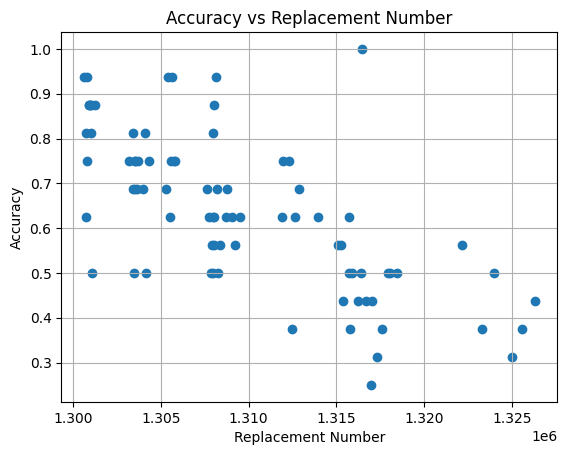

In [61]:
data = pd.read_csv('data/Property2/combined.csv')
# Plotting
plt.scatter(data['replacement_number'], data['accuracy'])
plt.title(f'Accuracy vs Replacement Number')
plt.xlabel('Replacement Number')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()



In [74]:
conf = 0.95
proportion = 0.5
intervals = []
As = [1.3e6, 1.303e6, 1.3067e6, 1.31e6, 1.3133e6, 1.3167e6]
data = pd.read_csv(f'data/Property2/combined.csv')
for i, A in enumerate(As):
    filtered_data = data[data['replacement_number'] > A]
    data_for_smc = filtered_data["accuracy"].values.tolist()
    result = spa(data_for_smc, ThresholdProperty(op="<"), confidence = conf, prob_threshold=proportion)
    intervals.append(result.confidence_interval)

print(intervals)

[ConfidenceInterval(low=0.625, high=0.6880000000000001), ConfidenceInterval(low=0.562, high=0.626), ConfidenceInterval(low=0.5, high=0.626), ConfidenceInterval(low=0.437, high=0.5630000000000001), ConfidenceInterval(low=0.437, high=0.501), ConfidenceInterval(low=0.375, high=0.501)]


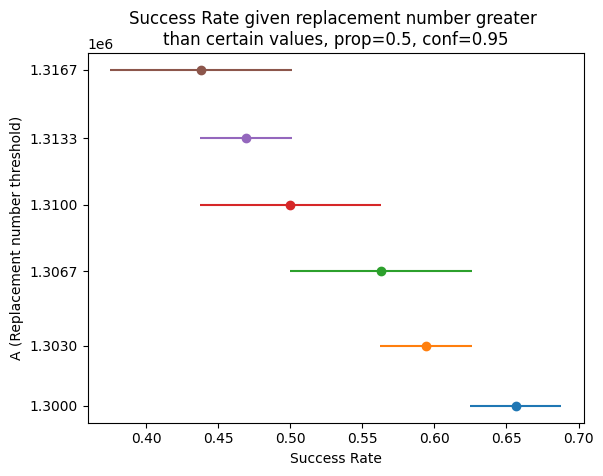

In [77]:
plt.title(f"Success Rate given replacement number greater \nthan certain values, prop={proportion}, conf={conf}")
plt.xlabel("Success Rate")
plt.ylabel("A (Replacement number threshold)")
plt.yticks(As)
for i, A in enumerate(As):
    low = intervals[i].low
    high = intervals[i].high

    plt.errorbar((low + high) / 2, A, xerr=(high - low) / 2, fmt='o')

plt.savefig(f"figures/ReplacementNums_p{proportion}_c{conf}.png")

In [70]:
# How noise affects replacement number
noise_levels = [2, 3, 4, 5]
conf = 0.95
proportion = 0.5
intervals = []
for noise_level in noise_levels:
    data = pd.read_csv(f'data/Property2/level{noise_level}.csv')
    data_for_smc = data["replacement_number"].values.tolist()
    granularity = 1000
    result = spa(data_for_smc, ThresholdProperty(op="<"), confidence = conf, prob_threshold=proportion, granularity=granularity)
    intervals.append(result.confidence_interval)

print(intervals)

[ConfidenceInterval(low=1315000, high=1319000), ConfidenceInterval(low=1308000, high=1312000), ConfidenceInterval(low=1303000, high=1308000), ConfidenceInterval(low=1300000, high=1306000)]


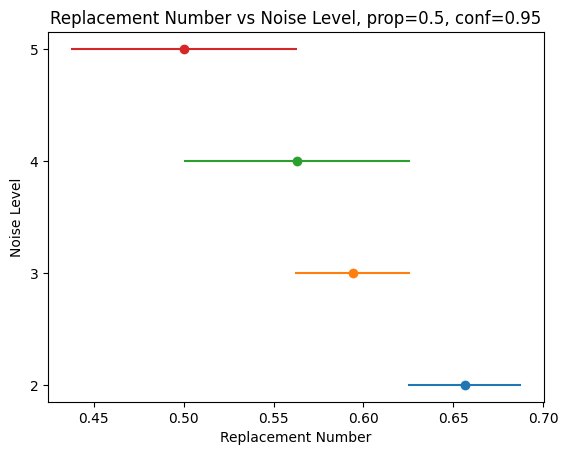

In [78]:

plt.title(f"Replacement Number vs Noise Level, prop={proportion}, conf={conf}")
plt.xlabel("Replacement Number")
plt.ylabel("Noise Level")
plt.yticks(noise_levels)
for i, noise_level in enumerate(noise_levels):
    low = intervals[i].low
    high = intervals[i].high

    plt.errorbar((low + high) / 2, noise_level, xerr=(high - low) / 2, fmt='o')

plt.savefig(f"figures/Noise_vsRN_p{proportion}_c{conf}.png")